In [1]:
#!/usr/bin/env python
#
import numpy as np
#import autograd.numpy as np
#from autograd import grad
import sys
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import *
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize
from sklearn.svm import SVC
from numpy.linalg import inv
#
np.set_printoptions(precision=2)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
#
#	Creating the top and bottom half circle
n = 50
x1 = 2*np.random.rand(n,1) - 1
y1 = np.sqrt(1 - x1**2)
z1 = -np.ones((n,1))
X0 = np.hstack((x1, y1))
#
x2 = 2*np.random.rand(n,1) - 1
y2 = np.sqrt(1 - (x2)**2) - 0.7 - np.random.rand(50,1)
z2 = np.ones((n,1))
X1 = np.hstack((x2, y2))
#
C = np.eye(n) - (1/n)*np.ones((n,n)) 
X = np.vstack((X0, X1))
y = np.vstack((z1,z2))
#

<br>
	Run Linear SVM here

In [2]:
clf = SVC(kernel='linear')
clf.fit(X, y)
ŷ = clf.predict(X)
print('Linear SVM accuracy:',accuracy_score(y, ŷ))
#
# Points of the linear SVM line
w = clf.coef_
b = clf.intercept_
xb = np.linspace(-1,1,20)
yb = (-w[0,0]/w[0,1])*xb - b/w[0,1]
#

Linear SVM accuracy: 0.98


/home/chieh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<br>
	Run Kernel SVM here

In [3]:
γ = 5
μ = 10
μ2 = 5
K = rbf_kernel(X, gamma=γ)
Y = np.diag(np.squeeze(y))
λ = np.random.randn(100,1)
η = 0.0004
#

In [4]:
def df(λ, A):
	[K, Y, γ, y] = A
	O = np.ones((100,1))
	dλ = np.zeros((100,1))
#
	dλ[λ<0] = -1
	df = Y.dot(K).dot(Y).dot(λ) + 2*μ*(λ.T.dot(y))*y - O #+ O.T.dot(dλ)
	return df
#
def foo(λ, A): 
	[K, Y, γ, y] = A
	O = np.ones((100,1))
	λT = np.transpose(λ)
	λTYKYλ = np.dot(np.dot(np.dot(np.dot(λT, Y), K), Y), λ)
	f = 0.5*λTYKYλ + μ*(np.dot(λT, y)*np.dot(λT, y)) - np.dot(np.transpose(O), λ)
	return f 
#
A = [K, Y, γ, y]
#
for i in range(30000):
	g = df(λ, A)
	λ = λ - η*g
#
	m = foo(λ, A)
	#print(m)
#

In [5]:
ŷ = K.dot(λ*y)
b = (np.min(ŷ[50:100]) + np.max(ŷ[0:50]))/2
#print(np.min(ŷ[0:50]), np.max(ŷ[0:50]))
#print(np.min(ŷ[50:100]), np.max(ŷ[50:100]))
#
ŷ = np.sign(K.dot(λ*y) + b)
print('Kernel SVM accuracy:',accuracy_score(y, ŷ))
#

Kernel SVM accuracy: 1.0


get kernel line

In [6]:
xv = np.linspace(-1,1,20)
yv = []
for xi in xv:
	r1 = xi*np.ones((100,1))
	r2 = np.reshape(np.linspace(-0.25, 0.75,100), (100,1))
	R = np.hstack((r1, r2))
#
	K2 = rbf_kernel(X, Y=R, gamma=γ)
	ŷ2 = K2.T.dot(λ*y) + b
	ag = np.argmin(np.absolute(ŷ2))
	yv.append(r2[ag])
#

Showing the original data

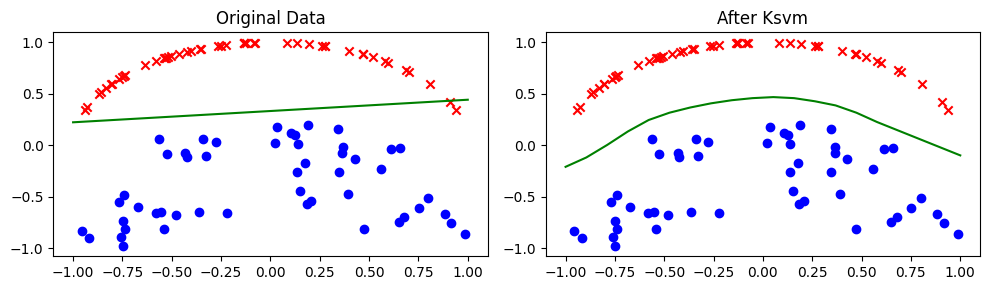

In [7]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.scatter(x1,y1, color='red', marker='x')
plt.scatter(x2,y2, color='blue', marker='o')
plt.plot(xb,yb, color='green')
plt.title('Original Data')
#
# Show KLDA
plt.subplot(122)
plt.scatter(x1,y1, color='red', marker='x')
plt.scatter(x2,y2, color='blue', marker='o')
plt.plot(xv,yv, color='green')
plt.title('After Ksvm')
#plt.ylim([-0.2,2])
#
plt.tight_layout()
plt.show()
#